#**기계학습기초 미니프로젝트 - 행복의 조건**

###UN지속가능발전해법네트워크의 세계행복보고서를 분석하고, 이에 부족한 지표 Generosity 를 어떻게 보완할 수 있을지 이 프로젝트에서 제안하고자 한다. 

###한국행정연구원의 '사회통합실태조사(2020)'의 관용성 항목들을 살펴보고, 행복과 관련 있는 Generosity 부분의 항목들을 찾는다. 여기서 가장 밀접한 관련을 갖는 부분들을 찾고, 이 항목들을 중점적으로 올려야 한다는 것을 제안하고자 한다.

#1. 데이터 불러오기

In [ ]:
!pip install pandas-profiling==3.1.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install category_encoders

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 49 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent

In [ ]:
import numpy as np
import os
import seaborn as sns
import pandas as pd
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import graphviz
from sklearn.tree import export_graphviz

from pandas_profiling import ProfileReport
from sklearn import metrics
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve
import statsmodels.api as sm
import itertools
import xgboost
import time 
from matplotlib import pyplot
from pandas import read_csv, set_option, DataFrame
from sklearn.preprocessing import StandardScaler
from category_encoders import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split, KFold, cross_val_score, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, confusion_matrix
from category_encoders import OrdinalEncoder
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression


In [ ]:
np.random.seed(42)

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/machine learning/2020_총괄_20220513_54560.csv', encoding='cp949')

In [ ]:
df

,데이터 ID,모수추정 가중치,표준화 가중치,어제의 주관적 정서 경험-행복감,어제의 주관적 정서 경험-걱정(근심),어제의 주관적 정서 경험-우울감,삶에 대한 만족도,본인이 하는 일이 가치 있다고 생각하는 정도,우리 사회의 안전성에 대한 인식,살고 있는 동네(시·군·구)의 안전성에 대한 인식,...,거처의 종류,거처의 점유형태,현재 건강상태,동부/읍면부b1,성별b2,연령b31,연령b32,직업b4,가구소득b5,학력b6
0,1,16975.256360,3.243756,8,2,2,7,2,7,8,...,1,2,4,1,2,3,3,9,5,4
1,10,13750.699283,2.627584,7,2,2,6,4,5,7,...,3,1,3,1,1,5,6,3,3,1
2,100,5875.836781,1.122798,8,6,2,7,9,3,4,...,2,2,4,1,2,2,2,2,6,4
3,1000,10524.771096,2.011150,5,7,5,4,5,4,7,...,1,2,3,1,1,4,4,5,5,3
4,1001,9455.833002,1.806890,5,7,5,5,4,5,5,...,1,2,3,1,2,4,4,9,5,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8331,995,11819.791253,2.258612,5,4,6,4,5,5,5,...,3,1,4,1,2,4,4,9,6,4
8332,996,3857.247836,0.737071,6,5,6,6,5,5,4,...,3,1,3,1,1,3,3,2,4,4
8333,997,4274.665465,0.816834,5,5,5,5,5,3,3,...,3,1,3,1,2,3,3,9,4,4
8334,998,6913.659013,1.321113,7,5,4,5,5,5,5,...,3,1,2,1,1,2,2,5,4,3


#2. 데이터 형태 분석 및 전처리

한국행정연구원의 사회통합실태조사(2020) 데이터의 관용성 지표에 해당하는 컬럼 값들을 가져온다.

In [ ]:
#필요한 컬럼값 가져오기
df1 = df[['어제의 주관적 정서 경험-행복감','저소득층 복지를 위한 추가 납세 의향 정도', '외국인을 우리나라 국민으로 수용하는 정도', '집단 구성원 포용 정도-장애인',
       '집단 구성원 포용 정도-결손 가정의 자녀', '집단 구성원 포용 정도-외국인 이민자·노동자',
       '집단 구성원 포용 정도-전과자', '집단 구성원 포용 정도-동성애자', '집단 구성원 포용 정도-북한이탈주민',
       '자녀의 배우자로서 집단 구성원별 포용 정도-장애인', '자녀의 배우자로서 집단 구성원별 포용 정도-결손 가정의 자녀',
       '자녀의 배우자로서 집단 구성원별 포용 정도-외국인 이민자·노동자', '자녀의 배우자로서 집단 구성원별 포용 정도-전과자',
       '자녀의 배우자로서 집단 구성원별 포용 정도-동성애자', '자녀의 배우자로서 집단 구성원별 포용 정도-북한이탈주민',
       '사회갈등의 원인 (1순위)', '사회갈등의 원인 (2순위)',
       '집단별 감정적 거리에 대한 인식-나와 정치적 의견이 다른 사람', '집단별 감정적 거리에 대한 인식-고령층',
       '집단별 감정적 거리에 대한 인식-청년층', '집단별 감정적 거리에 대한 인식-장애인',
       '집단별 감정적 거리에 대한 인식-이성', '집단별 감정적 거리에 대한 인식-동성애자',
       '집단별 감정적 거리에 대한 인식-나와 종교가 다른 사람', '집단별 감정적 거리에 대한 인식-전과자',
       '집단별 감정적 거리에 대한 인식-처음 만난 낯선 사람', '집단별 감정적 거리에 대한 인식-북한이탈주민(탈북자/새터민)',
       '집단별 감정적 거리에 대한 인식-국내 거주 외국인', '우리 사회 갈등 정도-빈곤층과 중·상층',
       '우리 사회 갈등 정도-보수와 진보', '우리 사회 갈등 정도-근로자와 고용주', '우리 사회 갈등 정도-수도권과 지방',
       '우리 사회 갈등 정도-개발과 환경보존', '우리 사회 갈등 정도-노인층과 젊은층', '우리 사회 갈등 정도-남자와 여자',
       '우리 사회 갈등 정도-종교 간', '우리 사회 갈등 정도-내국인과 외국인',
       '우리 사회의 갈등 해소를 위한 집단별 노력정도에 대한 인식-교육계',
       '우리 사회의 갈등 해소를 위한 집단별 노력정도에 대한 인식-국회',
       '우리 사회의 갈등 해소를 위한 집단별 노력정도에 대한 인식-기업',
       '우리 사회의 갈등 해소를 위한 집단별 노력정도에 대한 인식-노동조합단체',
       '우리 사회의 갈등 해소를 위한 집단별 노력정도에 대한 인식-법조계',
       '우리 사회의 갈등 해소를 위한 집단별 노력정도에 대한 인식-시민단체',
       '우리 사회의 갈등 해소를 위한 집단별 노력정도에 대한 인식-언론',
       '우리 사회의 갈등 해소를 위한 집단별 노력정도에 대한 인식-정부',
       '우리 사회의 갈등 해소를 위한 집단별 노력정도에 대한 인식-종교단체',
       '사회통합을 위해 중심적 역할을 해야 할 집단 (1순위)', '사회통합을 위해 중심적 역할을 해야 할 집단 (2순위)']]

In [ ]:
df1

,어제의 주관적 정서 경험-행복감,저소득층 복지를 위한 추가 납세 의향 정도,외국인을 우리나라 국민으로 수용하는 정도,집단 구성원 포용 정도-장애인,집단 구성원 포용 정도-결손 가정의 자녀,집단 구성원 포용 정도-외국인 이민자·노동자,집단 구성원 포용 정도-전과자,집단 구성원 포용 정도-동성애자,집단 구성원 포용 정도-북한이탈주민,자녀의 배우자로서 집단 구성원별 포용 정도-장애인,...,우리 사회의 갈등 해소를 위한 집단별 노력정도에 대한 인식-국회,우리 사회의 갈등 해소를 위한 집단별 노력정도에 대한 인식-기업,우리 사회의 갈등 해소를 위한 집단별 노력정도에 대한 인식-노동조합단체,우리 사회의 갈등 해소를 위한 집단별 노력정도에 대한 인식-법조계,우리 사회의 갈등 해소를 위한 집단별 노력정도에 대한 인식-시민단체,우리 사회의 갈등 해소를 위한 집단별 노력정도에 대한 인식-언론,우리 사회의 갈등 해소를 위한 집단별 노력정도에 대한 인식-정부,우리 사회의 갈등 해소를 위한 집단별 노력정도에 대한 인식-종교단체,사회통합을 위해 중심적 역할을 해야 할 집단 (1순위),사회통합을 위해 중심적 역할을 해야 할 집단 (2순위)
0,8,5,6,3,4,2,1,1,2,2,...,1,3,3,2,3,2,3,3,8,2
1,7,6,6,3,3,1,1,2,3,3,...,1,2,3,2,2,2,2,2,8,2
2,8,2,9,2,2,2,1,2,2,1,...,3,4,3,2,4,3,4,3,8,7
3,5,7,7,4,5,4,4,3,3,1,...,4,4,4,4,4,3,4,4,8,1
4,5,2,4,4,4,3,3,3,3,1,...,3,4,4,4,4,3,3,4,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8331,5,6,5,4,5,3,3,3,3,1,...,4,4,3,3,3,3,4,4,1,3
8332,6,5,5,3,4,1,2,2,2,2,...,3,3,4,3,4,3,3,3,3,2
8333,5,2,4,2,2,2,1,1,1,1,...,3,3,3,3,3,3,3,3,2,4
8334,7,5,5,4,5,4,1,4,4,3,...,1,1,1,1,1,1,1,1,6,7


In [ ]:
#타겟값을 이진타입으로 변형시켜서 이진분류로 분석한다.
for i in range(1,7):
    df1.loc[df1['어제의 주관적 정서 경험-행복감']== i, '어제의 주관적 정서 경험-행복감'] = 0


/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:723: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value, self.name)


In [ ]:
for i in range(7,11):
    df1.loc[df1['어제의 주관적 정서 경험-행복감']== i, '어제의 주관적 정서 경험-행복감'] = 1


/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:723: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value, self.name)


In [ ]:
df1

,어제의 주관적 정서 경험-행복감,저소득층 복지를 위한 추가 납세 의향 정도,외국인을 우리나라 국민으로 수용하는 정도,집단 구성원 포용 정도-장애인,집단 구성원 포용 정도-결손 가정의 자녀,집단 구성원 포용 정도-외국인 이민자·노동자,집단 구성원 포용 정도-전과자,집단 구성원 포용 정도-동성애자,집단 구성원 포용 정도-북한이탈주민,자녀의 배우자로서 집단 구성원별 포용 정도-장애인,...,우리 사회의 갈등 해소를 위한 집단별 노력정도에 대한 인식-국회,우리 사회의 갈등 해소를 위한 집단별 노력정도에 대한 인식-기업,우리 사회의 갈등 해소를 위한 집단별 노력정도에 대한 인식-노동조합단체,우리 사회의 갈등 해소를 위한 집단별 노력정도에 대한 인식-법조계,우리 사회의 갈등 해소를 위한 집단별 노력정도에 대한 인식-시민단체,우리 사회의 갈등 해소를 위한 집단별 노력정도에 대한 인식-언론,우리 사회의 갈등 해소를 위한 집단별 노력정도에 대한 인식-정부,우리 사회의 갈등 해소를 위한 집단별 노력정도에 대한 인식-종교단체,사회통합을 위해 중심적 역할을 해야 할 집단 (1순위),사회통합을 위해 중심적 역할을 해야 할 집단 (2순위)
0,1,5,6,3,4,2,1,1,2,2,...,1,3,3,2,3,2,3,3,8,2
1,1,6,6,3,3,1,1,2,3,3,...,1,2,3,2,2,2,2,2,8,2
2,1,2,9,2,2,2,1,2,2,1,...,3,4,3,2,4,3,4,3,8,7
3,0,7,7,4,5,4,4,3,3,1,...,4,4,4,4,4,3,4,4,8,1
4,0,2,4,4,4,3,3,3,3,1,...,3,4,4,4,4,3,3,4,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8331,0,6,5,4,5,3,3,3,3,1,...,4,4,3,3,3,3,4,4,1,3
8332,0,5,5,3,4,1,2,2,2,2,...,3,3,4,3,4,3,3,3,3,2
8333,0,2,4,2,2,2,1,1,1,1,...,3,3,3,3,3,3,3,3,2,4
8334,1,5,5,4,5,4,1,4,4,3,...,1,1,1,1,1,1,1,1,6,7


In [ ]:
profile = ProfileReport(df1, minimal=True).to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:
df1.columns 

Index(['어제의 주관적 정서 경험-행복감', '저소득층 복지를 위한 추가 납세 의향 정도',
       '외국인을 우리나라 국민으로 수용하는 정도', '집단 구성원 포용 정도-장애인', '집단 구성원 포용 정도-결손 가정의 자녀',
       '집단 구성원 포용 정도-외국인 이민자·노동자', '집단 구성원 포용 정도-전과자', '집단 구성원 포용 정도-동성애자',
       '집단 구성원 포용 정도-북한이탈주민', '자녀의 배우자로서 집단 구성원별 포용 정도-장애인',
       '자녀의 배우자로서 집단 구성원별 포용 정도-결손 가정의 자녀',
       '자녀의 배우자로서 집단 구성원별 포용 정도-외국인 이민자·노동자', '자녀의 배우자로서 집단 구성원별 포용 정도-전과자',
       '자녀의 배우자로서 집단 구성원별 포용 정도-동성애자', '자녀의 배우자로서 집단 구성원별 포용 정도-북한이탈주민',
       '사회갈등의 원인 (1순위)', '사회갈등의 원인 (2순위)',
       '집단별 감정적 거리에 대한 인식-나와 정치적 의견이 다른 사람', '집단별 감정적 거리에 대한 인식-고령층',
       '집단별 감정적 거리에 대한 인식-청년층', '집단별 감정적 거리에 대한 인식-장애인',
       '집단별 감정적 거리에 대한 인식-이성', '집단별 감정적 거리에 대한 인식-동성애자',
       '집단별 감정적 거리에 대한 인식-나와 종교가 다른 사람', '집단별 감정적 거리에 대한 인식-전과자',
       '집단별 감정적 거리에 대한 인식-처음 만난 낯선 사람', '집단별 감정적 거리에 대한 인식-북한이탈주민(탈북자/새터민)',
       '집단별 감정적 거리에 대한 인식-국내 거주 외국인', '우리 사회 갈등 정도-빈곤층과 중·상층',
       '우리 사회 갈등 정도-보수와 진보', '우리 사회 갈등 정도-근로자와 고용주', '우리 사회 갈등 정도-수도권과 지방',
       '우리 사회 갈등 정도-개발과 환경

In [ ]:
df1.describe()

,어제의 주관적 정서 경험-행복감,저소득층 복지를 위한 추가 납세 의향 정도,외국인을 우리나라 국민으로 수용하는 정도,집단 구성원 포용 정도-장애인,집단 구성원 포용 정도-결손 가정의 자녀,집단 구성원 포용 정도-외국인 이민자·노동자,집단 구성원 포용 정도-전과자,집단 구성원 포용 정도-동성애자,집단 구성원 포용 정도-북한이탈주민,자녀의 배우자로서 집단 구성원별 포용 정도-장애인,...,우리 사회의 갈등 해소를 위한 집단별 노력정도에 대한 인식-국회,우리 사회의 갈등 해소를 위한 집단별 노력정도에 대한 인식-기업,우리 사회의 갈등 해소를 위한 집단별 노력정도에 대한 인식-노동조합단체,우리 사회의 갈등 해소를 위한 집단별 노력정도에 대한 인식-법조계,우리 사회의 갈등 해소를 위한 집단별 노력정도에 대한 인식-시민단체,우리 사회의 갈등 해소를 위한 집단별 노력정도에 대한 인식-언론,우리 사회의 갈등 해소를 위한 집단별 노력정도에 대한 인식-정부,우리 사회의 갈등 해소를 위한 집단별 노력정도에 대한 인식-종교단체,사회통합을 위해 중심적 역할을 해야 할 집단 (1순위),사회통합을 위해 중심적 역할을 해야 할 집단 (2순위)
count,8336.000000,8336.000000,8336.000000,8336.000000,8336.000000,8336.000000,8336.000000,8336.000000,8336.000000,8336.000000,...,8336.000000,8336.000000,8336.000000,8336.000000,8336.000000,8336.000000,8336.000000,8336.000000,8336.000000,8336.000000
mean,0.536348,5.161468,5.182102,3.099808,3.386876,2.731046,1.450216,1.643234,2.442179,2.296905,...,2.569578,2.990763,2.896233,2.821377,2.991363,2.855926,3.004079,2.916867,4.834813,5.122601
std,0.498707,1.926691,1.837866,0.891267,1.044041,0.927420,0.757711,0.884647,0.982030,0.958288,...,0.998117,0.873958,0.884936,0.903305,0.883725,0.920732,0.981525,0.866035,2.853671,2.596955
min,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,4.000000,4.000000,2.000000,3.000000,2.000000,1.000000,1.000000,2.000000,2.000000,...,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
50%,1.000000,5.000000,5.000000,3.000000,3.000000,3.000000,1.000000,1.000000,2.000000,2.000000,...,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,5.000000,6.000000
75%,1.000000,7.000000,6.000000,4.000000,4.000000,3.000000,2.000000,2.000000,3.000000,3.000000,...,3.000000,4.000000,3.000000,3.000000,4.000000,3.000000,4.000000,3.000000,8.000000,8.000000
max,1.000000,10.000000,10.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,...,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,9.000000,9.000000


In [ ]:
df1.isna().sum().sort_values()

어제의 주관적 정서 경험-행복감                          0
집단별 감정적 거리에 대한 인식-북한이탈주민(탈북자/새터민)          0
집단별 감정적 거리에 대한 인식-국내 거주 외국인                0
우리 사회 갈등 정도-빈곤층과 중·상층                      0
우리 사회 갈등 정도-보수와 진보                         0
우리 사회 갈등 정도-근로자와 고용주                       0
우리 사회 갈등 정도-수도권과 지방                        0
우리 사회 갈등 정도-개발과 환경보존                       0
우리 사회 갈등 정도-노인층과 젊은층                       0
우리 사회 갈등 정도-남자와 여자                         0
집단별 감정적 거리에 대한 인식-처음 만난 낯선 사람              0
우리 사회 갈등 정도-종교 간                           0
우리 사회의 갈등 해소를 위한 집단별 노력정도에 대한 인식-교육계       0
우리 사회의 갈등 해소를 위한 집단별 노력정도에 대한 인식-국회        0
우리 사회의 갈등 해소를 위한 집단별 노력정도에 대한 인식-기업        0
우리 사회의 갈등 해소를 위한 집단별 노력정도에 대한 인식-노동조합단체    0
우리 사회의 갈등 해소를 위한 집단별 노력정도에 대한 인식-법조계       0
우리 사회의 갈등 해소를 위한 집단별 노력정도에 대한 인식-시민단체      0
우리 사회의 갈등 해소를 위한 집단별 노력정도에 대한 인식-언론        0
우리 사회의 갈등 해소를 위한 집단별 노력정도에 대한 인식-정부        0
우리 사회의 갈등 해소를 위한 집단별 노력정도에 대한 인식-종교단체      0
우리 사회 갈등 정도-내국인과 외국인                       0
집단별 감정적 거리

In [ ]:
df1['어제의 주관적 정서 경험-행복감'].value_counts(normalize=True)

1    0.536348
0    0.463652
Name: 어제의 주관적 정서 경험-행복감, dtype: float64

#3. 데이터셋 준비 및 데이터 분석

In [ ]:
train, val = train_test_split(df1, test_size= 0.2, random_state = 11)

In [ ]:
target = '어제의 주관적 정서 경험-행복감'
features = df1.columns.drop([target])
X_train = train[features]
y_train = train[target]
X_val = val[features]
y_val = val[target]

In [ ]:
#선형 회귀
mlr = LinearRegression()
mlr.fit(X_train, y_train) 

LinearRegression()

In [ ]:
print('검증 정확도: ', mlr.score(X_val, y_val))

검증 정확도:  0.046461344587134135


In [ ]:
#결정 트리
tree_clf = DecisionTreeClassifier(max_depth=5, random_state=2)
tree_clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, random_state=2)

In [ ]:
print('검증 정확도: ', tree_clf.score(X_val, y_val))

검증 정확도:  0.6061151079136691


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


Text(0.5, 1.0, 'Confusion matrix, n = 1668')

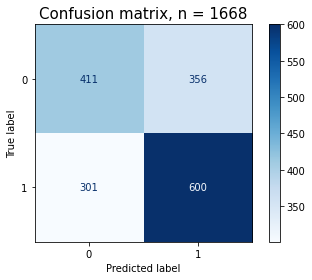

In [ ]:
fig, ax = plt.subplots()
pcm = plot_confusion_matrix(tree_clf, X_val, y_val,
                            cmap=plt.cm.Blues,
                            ax=ax);
plt.title(f'Confusion matrix, n = {len(y_val)}', fontsize=15)

In [ ]:
#파이프라인 구축 
pipe1 = make_pipeline(
    OrdinalEncoder(), 
    DecisionTreeClassifier(max_depth=5, random_state=2)
)

In [ ]:
pipe1.fit(X_train, y_train)
print('검증 정확도: ', pipe1.score(X_val, y_val))

검증 정확도:  0.6061151079136691


In [ ]:
tree = pipe1.named_steps['decisiontreeclassifier']

In [ ]:
tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, random_state=2)

In [ ]:
tree.feature_importances_

array([0.12380022, 0.23508584, 0.13718983, 0.08870106, 0.01418864,
       0.02935813, 0.01046451, 0.        , 0.02926206, 0.        ,
       0.05494573, 0.        , 0.        , 0.        , 0.01129339,
       0.0285694 , 0.        , 0.        , 0.01470919, 0.        ,
       0.06184941, 0.        , 0.03636545, 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.01048734, 0.        ,
       0.02936039, 0.        , 0.        , 0.02183271, 0.        ,
       0.01695701, 0.02349958, 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.02208011])

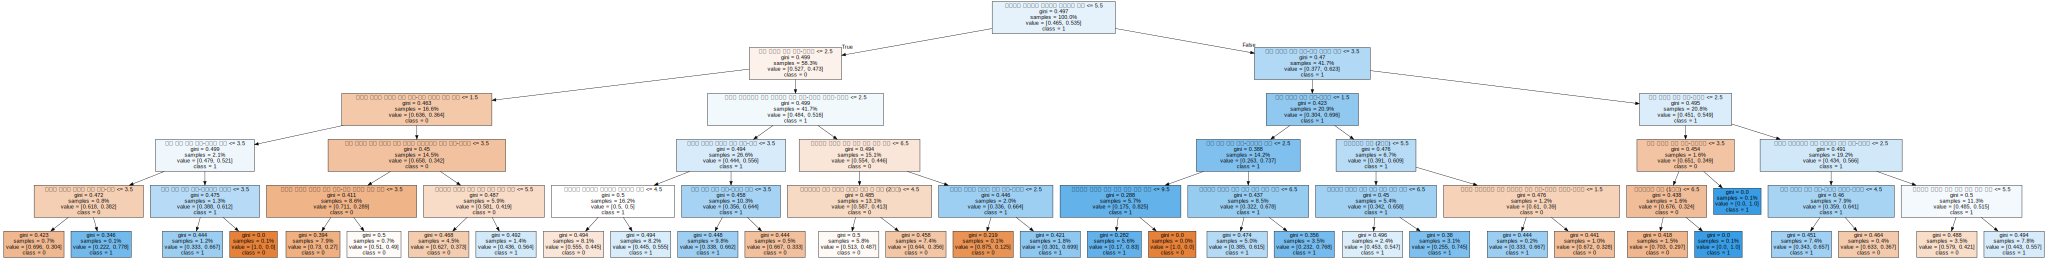

In [ ]:
import graphviz
from sklearn.tree import export_graphviz

tree = pipe1.named_steps['decisiontreeclassifier']

dot_data = export_graphviz(
    tree,
    feature_names=X_train.columns, 
    class_names=y_train.unique().astype(str), 
    filled=True, 
    proportion=True
)

graphviz.Source(dot_data)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


Text(0.5, 1.0, 'Confusion matrix, n = 1668')

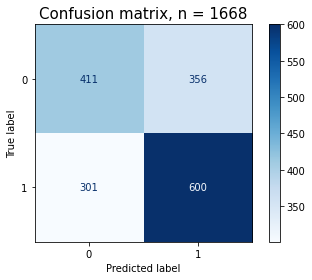

In [ ]:
fig, ax = plt.subplots()
pcm = plot_confusion_matrix(pipe1, X_val, y_val,
                            cmap=plt.cm.Blues,
                            ax=ax);
plt.title(f'Confusion matrix, n = {len(y_val)}', fontsize=15)

In [ ]:
y_pred = pipe1.predict(X_val)
print(classification_report(y_val, y_pred))

              precision    recall  f1-score   support

           0       0.58      0.54      0.56       767
           1       0.63      0.67      0.65       901

    accuracy                           0.61      1668
   macro avg       0.60      0.60      0.60      1668
weighted avg       0.60      0.61      0.60      1668



In [ ]:
y_pred_proba = pipe1.predict_proba(X_val)[:, -1]
print('AUC score: ', roc_auc_score(y_val, y_pred_proba))

AUC score:  0.6338191521227319


Text(0, 0.5, 'TPR')

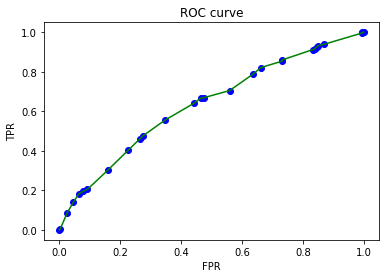

In [ ]:
fpr, tpr, thresholds = roc_curve(y_val, y_pred_proba)

plt.scatter(fpr, tpr, color='blue')
plt.plot(fpr, tpr, color='green')
plt.title('ROC curve')
plt.xlabel('FPR')
plt.ylabel('TPR')

In [ ]:
y_train.value_counts(normalize=True)

1    0.535393
0    0.464607
Name: 어제의 주관적 정서 경험-행복감, dtype: float64

In [ ]:
#LogisticRegression 적용

pipe2 = make_pipeline(
    OneHotEncoder(), 
    SimpleImputer(), 
    StandardScaler(), 
    LogisticRegression(solver = 'lbfgs')
)
pipe2.fit(X_train, y_train)

print('검증세트 정확도', pipe2.score(X_val, y_val))

y_pred = pipe2.predict(X_val)

검증세트 정확도 0.5953237410071942


In [ ]:
pipe2.named_steps

{'logisticregression': LogisticRegression(n_jobs=-1),
 'onehotencoder': OneHotEncoder(cols=[]),
 'simpleimputer': SimpleImputer(),
 'standardscaler': StandardScaler()}

In [ ]:
y_pred_proba = pipe2.predict_proba(X_val)[:, -1]
print('AUC score: ', roc_auc_score(y_val, y_pred_proba))

AUC score:  0.6339790497882261


In [ ]:
plt.rc('font', family='NanumBarunGothic') 

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


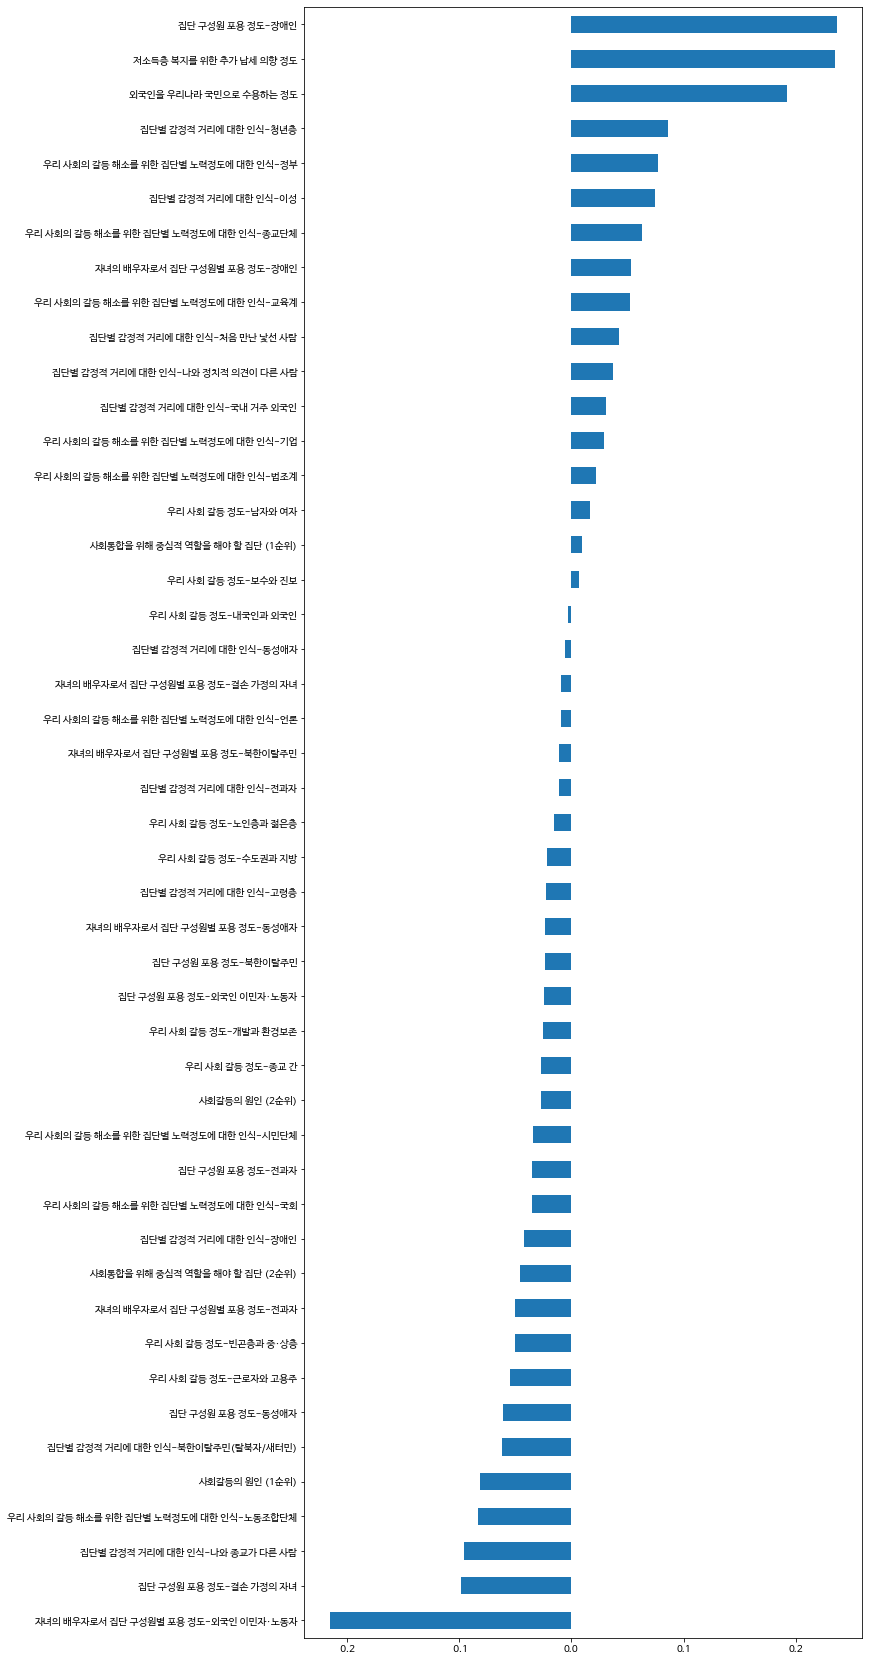

In [ ]:
model_lr = pipe2.named_steps['logisticregression']
enc = pipe2.named_steps['onehotencoder']
encoded_columns = enc.transform(X_val).columns
coefficients = pd.Series(model_lr.coef_[0], encoded_columns)
plt.figure(figsize=(10,30))
coefficients.sort_values().plot.barh();

In [ ]:
coefficients

저소득층 복지를 위한 추가 납세 의향 정도                    0.235100
외국인을 우리나라 국민으로 수용하는 정도                     0.191865
집단 구성원 포용 정도-장애인                           0.236729
집단 구성원 포용 정도-결손 가정의 자녀                    -0.098231
집단 구성원 포용 정도-외국인 이민자·노동자                  -0.024392
집단 구성원 포용 정도-전과자                          -0.034936
집단 구성원 포용 정도-동성애자                         -0.061180
집단 구성원 포용 정도-북한이탈주민                       -0.023652
자녀의 배우자로서 집단 구성원별 포용 정도-장애인                0.053470
자녀의 배우자로서 집단 구성원별 포용 정도-결손 가정의 자녀         -0.009446
자녀의 배우자로서 집단 구성원별 포용 정도-외국인 이민자·노동자       -0.215339
자녀의 배우자로서 집단 구성원별 포용 정도-전과자               -0.050199
자녀의 배우자로서 집단 구성원별 포용 정도-동성애자              -0.023636
자녀의 배우자로서 집단 구성원별 포용 정도-북한이탈주민            -0.010679
사회갈등의 원인 (1순위)                            -0.081278
사회갈등의 원인 (2순위)                            -0.026994
집단별 감정적 거리에 대한 인식-나와 정치적 의견이 다른 사람         0.036911
집단별 감정적 거리에 대한 인식-고령층                     -0.022642
집단별 감정적 거리에 대한 인식-청년층                      0.086335
집단별 감정적 거리에 

In [ ]:
#OneHotEncoder, SimpleImputer 추가 및 criterion 조정
pipe3 = make_pipeline(
    OneHotEncoder(use_cat_names=True),  
    SimpleImputer(), 
    DecisionTreeClassifier(max_depth=5, random_state=2, criterion='entropy')
)

pipe3.fit(X_train, y_train)
print('훈련 정확도: ', pipe3.score(X_train, y_train))
print('검증 정확도: ', pipe3.score(X_val, y_val))

훈련 정확도:  0.6300239952009599
검증 정확도:  0.6133093525179856


In [ ]:
y_val.value_counts(normalize=True)

1    0.540168
0    0.459832
Name: 어제의 주관적 정서 경험-행복감, dtype: float64

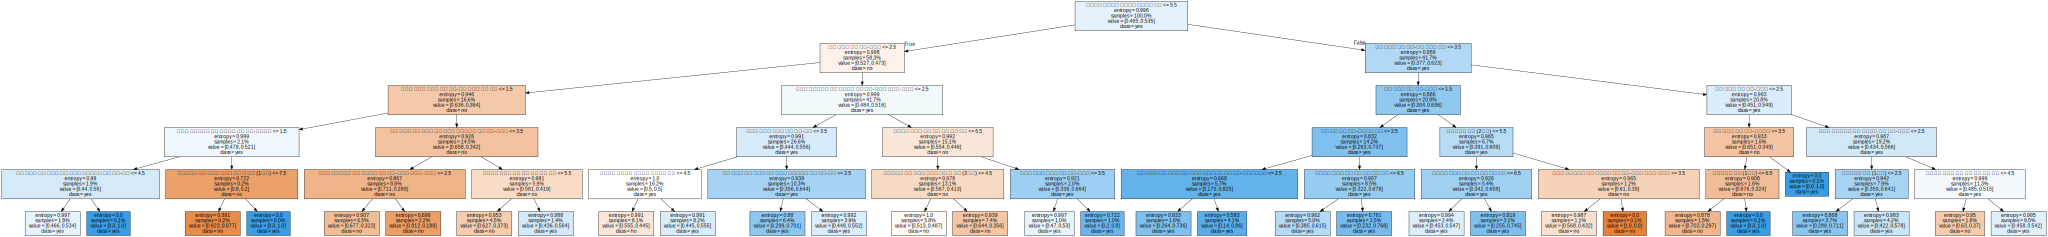

In [ ]:
model_dt = pipe3.named_steps['decisiontreeclassifier']
enc = pipe3.named_steps['onehotencoder']
encoded_columns = enc.transform(X_val).columns

dot_data = export_graphviz(model_dt
                          , max_depth=5
                          , feature_names=encoded_columns
                          , class_names=['no', 'yes']
                          , filled=True
                          , proportion=True)


display(graphviz.Source(dot_data))

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


Text(0.5, 1.0, 'Confusion matrix, n = 1668')

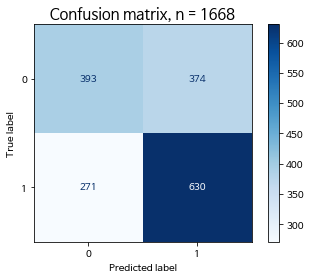

In [ ]:
fig, ax = plt.subplots()
pcm = plot_confusion_matrix(pipe3, X_val, y_val,
                            cmap=plt.cm.Blues,
                            ax=ax);
plt.title(f'Confusion matrix, n = {len(y_val)}', fontsize=15)

In [ ]:
y_pred = pipe3.predict(X_val)
print(classification_report(y_val, y_pred))

              precision    recall  f1-score   support

           0       0.59      0.51      0.55       767
           1       0.63      0.70      0.66       901

    accuracy                           0.61      1668
   macro avg       0.61      0.61      0.61      1668
weighted avg       0.61      0.61      0.61      1668



In [ ]:
y_pred_proba = pipe3.predict_proba(X_val)[:, -1]
print('AUC score: ', roc_auc_score(y_val, y_pred_proba))

AUC score:  0.6442660407746282


Text(0, 0.5, 'TPR')

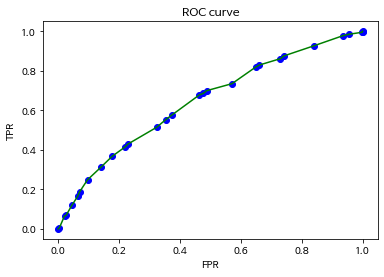

In [ ]:
fpr, tpr, thresholds = roc_curve(y_val, y_pred_proba)

plt.scatter(fpr, tpr, color='blue')
plt.plot(fpr, tpr, color='green')
plt.title('ROC curve')
plt.xlabel('FPR')
plt.ylabel('TPR')

In [ ]:
#min_leaf, max_depth 설정
pipe4 = make_pipeline(
    OneHotEncoder(use_cat_names=True), 
    SimpleImputer(), 
    DecisionTreeClassifier(min_samples_leaf=10, random_state=2)
)

pipe4.fit(X_train, y_train)
print('훈련 정확도', pipe4.score(X_train, y_train))
print('검증 정확도', pipe4.score(X_val, y_val))

훈련 정확도 0.7831433713257349
검증 정확도 0.5905275779376499


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


Text(0.5, 1.0, 'Confusion matrix, n = 1668')

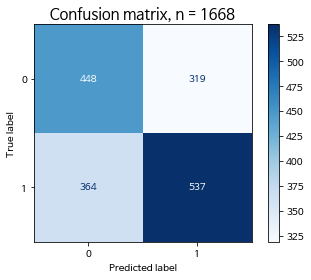

In [ ]:
fig, ax = plt.subplots()
pcm = plot_confusion_matrix(pipe4, X_val, y_val,
                            cmap=plt.cm.Blues,
                            ax=ax);
plt.title(f'Confusion matrix, n = {len(y_val)}', fontsize=15)

In [ ]:
y_pred_proba = pipe4.predict_proba(X_val)[:, -1]
print('AUC score: ', roc_auc_score(y_val, y_pred_proba))

AUC score:  0.6161754214859051


In [ ]:
y_pred = pipe4.predict(X_val)
print(classification_report(y_val, y_pred))

              precision    recall  f1-score   support

           0       0.55      0.58      0.57       767
           1       0.63      0.60      0.61       901

    accuracy                           0.59      1668
   macro avg       0.59      0.59      0.59      1668
weighted avg       0.59      0.59      0.59      1668



Text(0, 0.5, 'TPR')

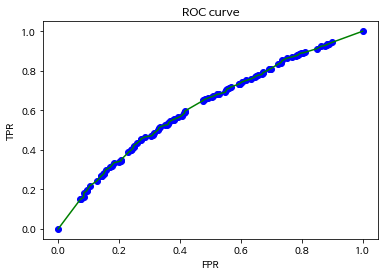

In [ ]:
fpr, tpr, thresholds = roc_curve(y_val, y_pred_proba)

plt.scatter(fpr, tpr, color='blue')
plt.plot(fpr, tpr, color='green')
plt.title('ROC curve')
plt.xlabel('FPR')
plt.ylabel('TPR')

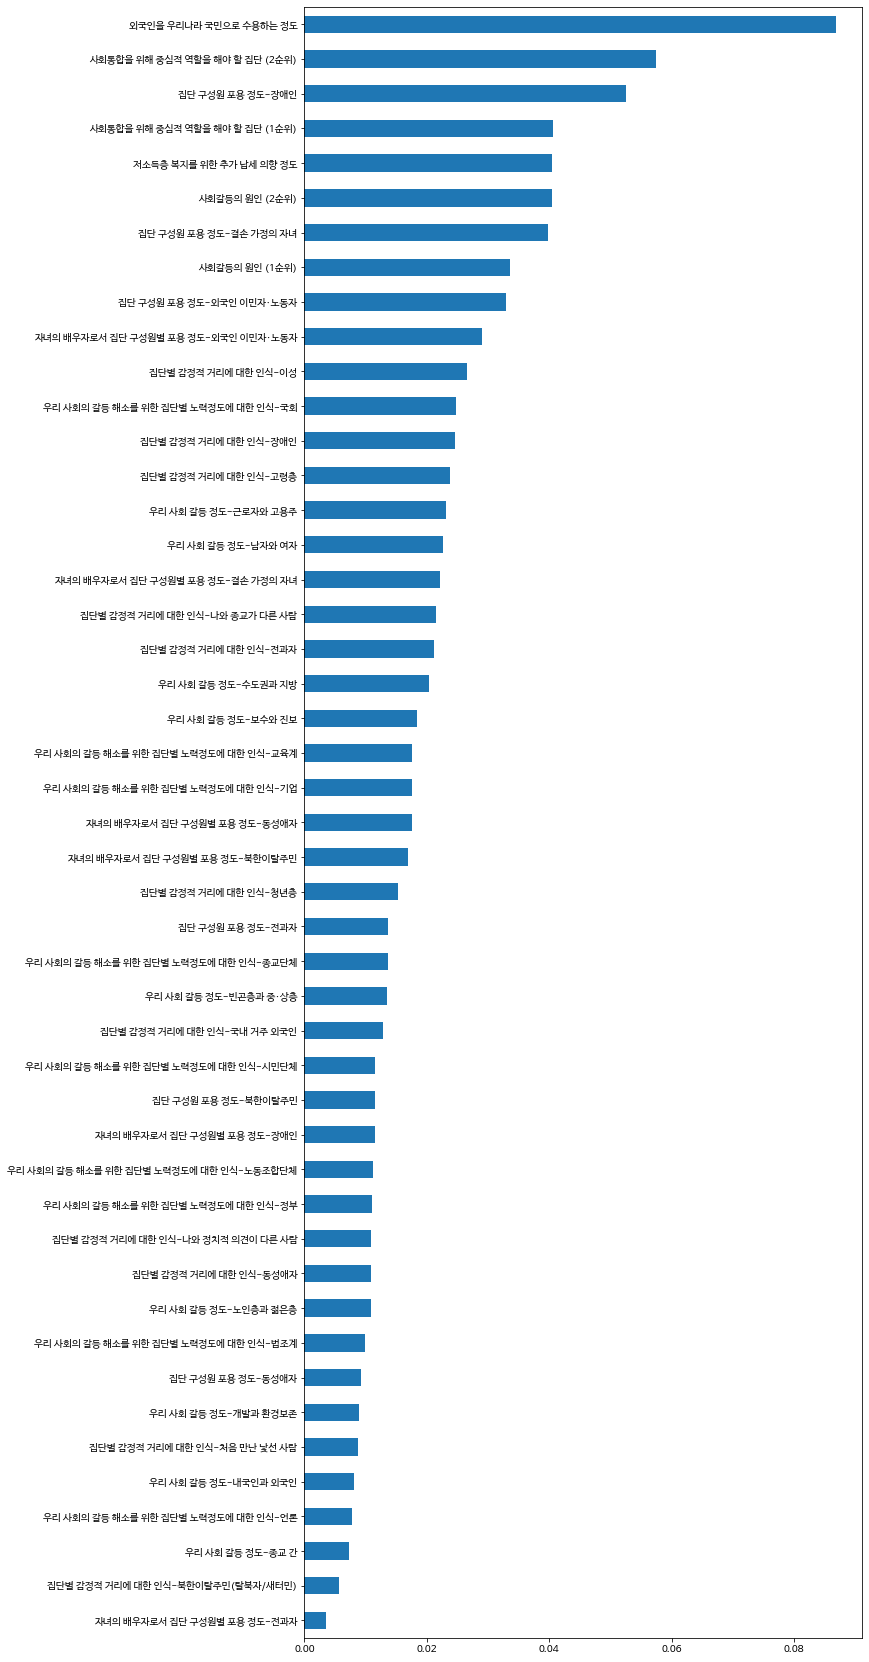

In [ ]:
model_dt = pipe4.named_steps['decisiontreeclassifier']
importances = pd.Series(model_dt.feature_importances_, encoded_columns)
plt.figure(figsize=(10,30))
importances.sort_values().plot.barh();

In [ ]:
pipe5 = make_pipeline(
    OneHotEncoder(use_cat_names=True), 
    SimpleImputer(), 
    DecisionTreeClassifier(max_depth=6, random_state=2)
)

pipe5.fit(X_train, y_train)
print('훈련 정확도', pipe5.score(X_train, y_train))
print('검증 정확도', pipe5.score(X_val, y_val))

훈련 정확도 0.6559688062387522
검증 정확도 0.6091127098321343


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


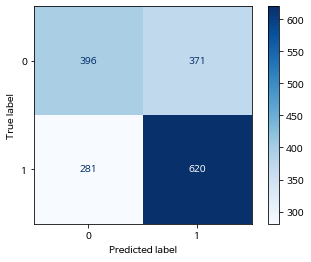

In [ ]:
fig, ax = plt.subplots()
pcm = plot_confusion_matrix(pipe5, X_val, y_val,
                            cmap=plt.cm.Blues,
                            ax=ax);

In [ ]:
y_pred_proba = pipe5.predict_proba(X_val)[:, -1]
print('AUC score: ', roc_auc_score(y_val, y_pred_proba))

AUC score:  0.6376458433118641


In [ ]:
y_pred = pipe5.predict(X_val)
print(classification_report(y_val, y_pred))

              precision    recall  f1-score   support

           0       0.58      0.52      0.55       767
           1       0.63      0.69      0.66       901

    accuracy                           0.61      1668
   macro avg       0.61      0.60      0.60      1668
weighted avg       0.61      0.61      0.61      1668



Text(0, 0.5, 'TPR')

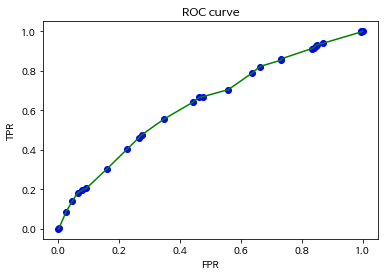

In [ ]:
fpr, tpr, thresholds = roc_curve(y_val, y_pred_proba)

plt.scatter(fpr, tpr, color='blue')
plt.plot(fpr, tpr, color='green')
plt.title('ROC curve')
plt.xlabel('FPR')
plt.ylabel('TPR')

In [ ]:
model_dt = pipe5.named_steps['decisiontreeclassifier']

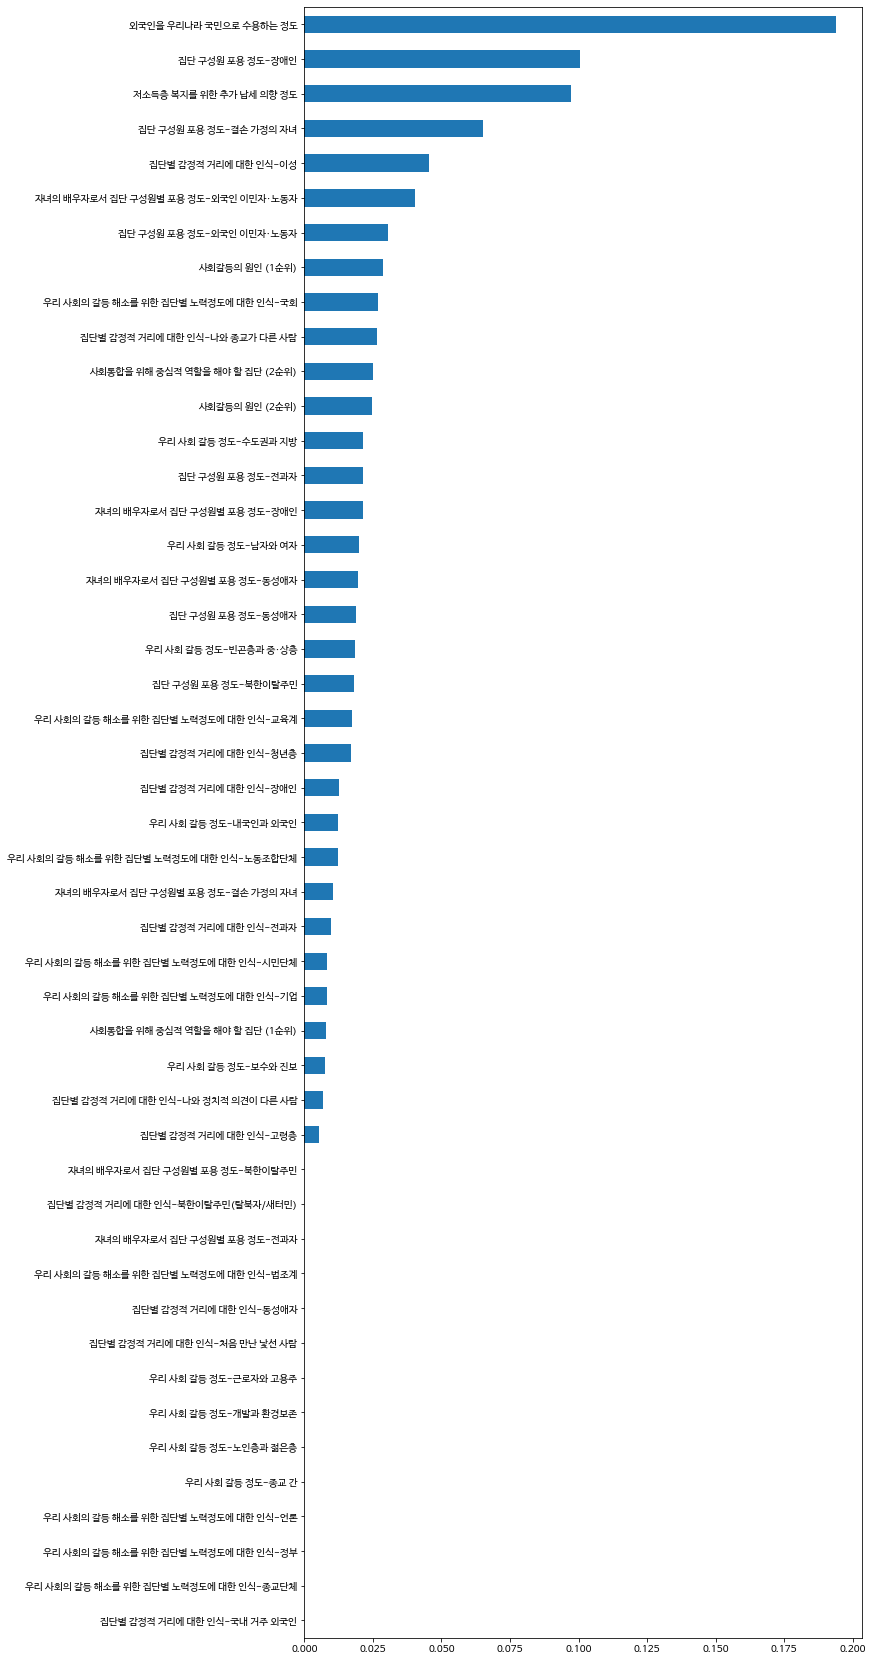

In [ ]:
importances = pd.Series(model_dt.feature_importances_, encoded_columns)
plt.figure(figsize=(10,30))
importances.sort_values().plot.barh();

In [ ]:
pipe3 = make_pipeline(
    OneHotEncoder(use_cat_names=True),  
    SimpleImputer(), 
    DecisionTreeClassifier(random_state=1, criterion='entropy')
)

In [ ]:
# 하이퍼 파라미터 조정으로 최상의 모델 만들어보기 

pipe6 = make_pipeline(
    OneHotEncoder(use_cat_names=True),  
    SimpleImputer(), 
    DecisionTreeClassifier(max_depth=4,min_samples_leaf=5, criterion='entropy', random_state=10)
)

pipe6.fit(X_train, y_train)
print('훈련 정확도', pipe6.score(X_train, y_train))
print('검증 정확도', pipe6.score(X_val, y_val))

훈련 정확도 0.6132273545290942
검증 정확도 0.6217026378896883


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


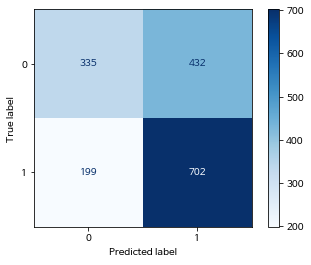

In [ ]:
fig, ax = plt.subplots()
pcm = plot_confusion_matrix(pipe6, X_val, y_val,
                            cmap=plt.cm.Blues,
                            ax=ax);

In [ ]:
y_pred = pipe6.predict(X_val)
print(classification_report(y_val, y_pred))

              precision    recall  f1-score   support

           0       0.63      0.44      0.51       767
           1       0.62      0.78      0.69       901

    accuracy                           0.62      1668
   macro avg       0.62      0.61      0.60      1668
weighted avg       0.62      0.62      0.61      1668



In [ ]:
y_pred_proba = pipe6.predict_proba(X_val)[:, -1]
print('AUC score: ', roc_auc_score(y_val, y_pred_proba))

AUC score:  0.647751954586169


Text(0, 0.5, 'TPR')

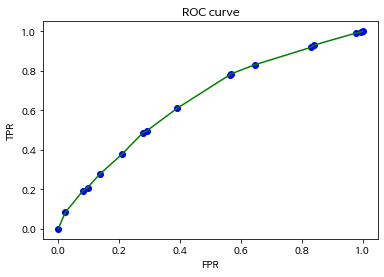

In [ ]:
fpr, tpr, thresholds = roc_curve(y_val, y_pred_proba)

plt.scatter(fpr, tpr, color='blue')
plt.plot(fpr, tpr, color='green')
plt.title('ROC curve')
plt.xlabel('FPR')
plt.ylabel('TPR')

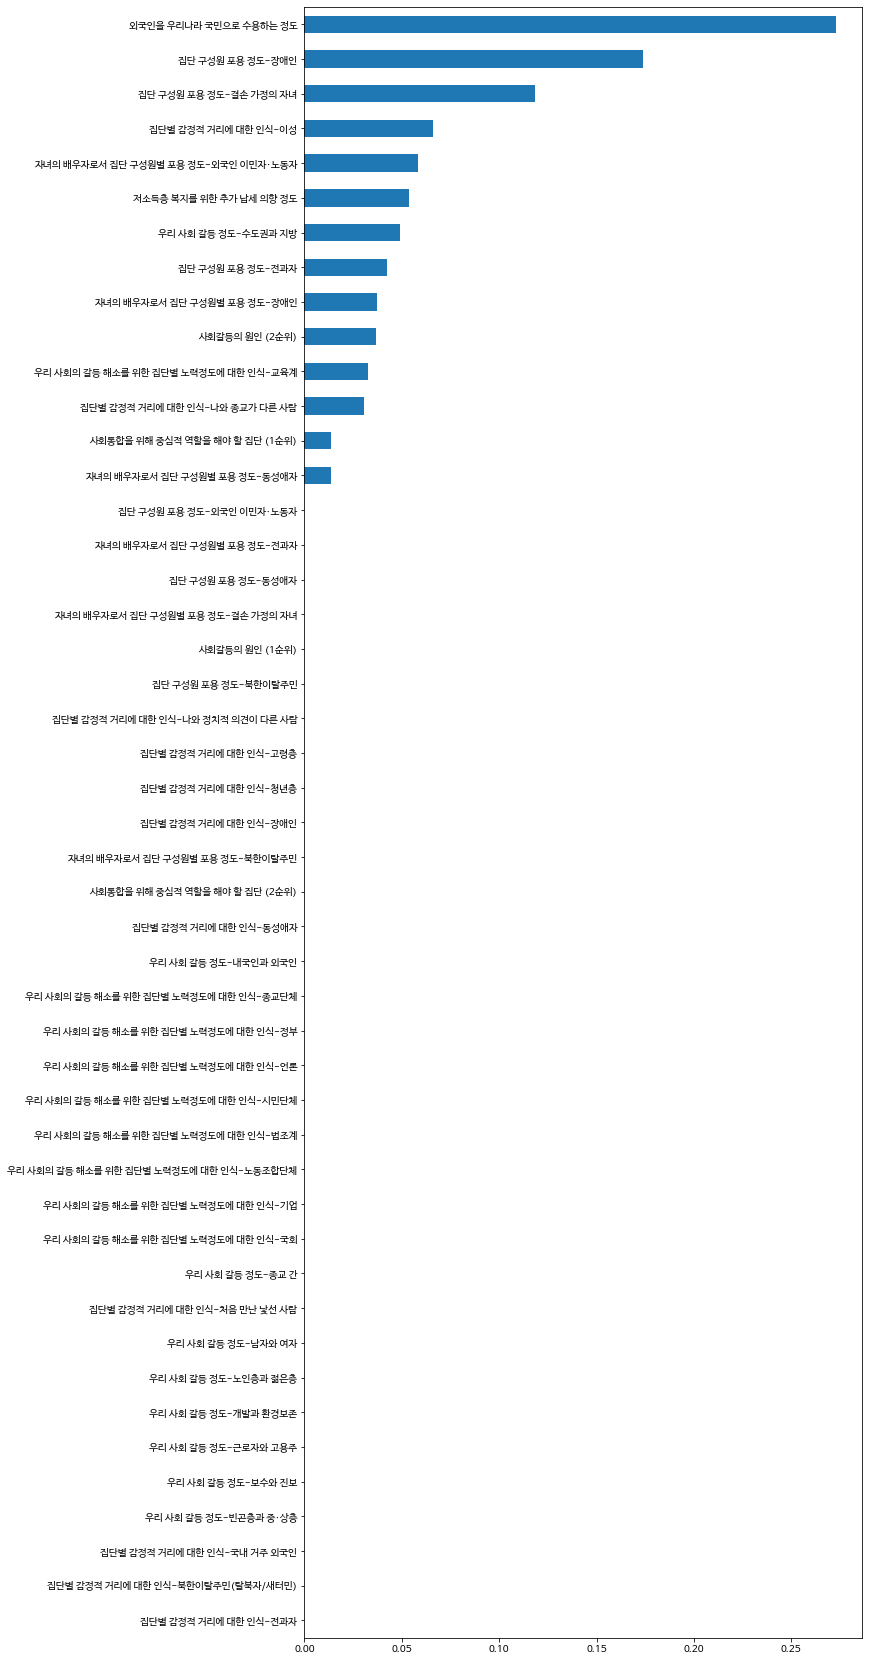

In [ ]:
model_dt = pipe6.named_steps['decisiontreeclassifier']
importances = pd.Series(model_dt.feature_importances_, encoded_columns)
plt.figure(figsize=(10,30))
importances.sort_values().plot.barh();

In [ ]:
importances

저소득층 복지를 위한 추가 납세 의향 정도                    0.053969
외국인을 우리나라 국민으로 수용하는 정도                     0.272828
집단 구성원 포용 정도-장애인                           0.173831
집단 구성원 포용 정도-결손 가정의 자녀                     0.118583
집단 구성원 포용 정도-외국인 이민자·노동자                   0.000000
집단 구성원 포용 정도-전과자                           0.042433
집단 구성원 포용 정도-동성애자                          0.000000
집단 구성원 포용 정도-북한이탈주민                        0.000000
자녀의 배우자로서 집단 구성원별 포용 정도-장애인                0.037519
자녀의 배우자로서 집단 구성원별 포용 정도-결손 가정의 자녀          0.000000
자녀의 배우자로서 집단 구성원별 포용 정도-외국인 이민자·노동자        0.058418
자녀의 배우자로서 집단 구성원별 포용 정도-전과자                0.000000
자녀의 배우자로서 집단 구성원별 포용 정도-동성애자               0.013609
자녀의 배우자로서 집단 구성원별 포용 정도-북한이탈주민             0.000000
사회갈등의 원인 (1순위)                             0.000000
사회갈등의 원인 (2순위)                             0.036646
집단별 감정적 거리에 대한 인식-나와 정치적 의견이 다른 사람         0.000000
집단별 감정적 거리에 대한 인식-고령층                      0.000000
집단별 감정적 거리에 대한 인식-청년층                      0.000000
집단별 감정적 거리에 

#4. 피쳐 선택 및 최종 분석


In [231]:
df_selec = df1[['어제의 주관적 정서 경험-행복감','집단 구성원 포용 정도-장애인', '저소득층 복지를 위한 추가 납세 의향 정도',
                '외국인을 우리나라 국민으로 수용하는 정도','집단별 감정적 거리에 대한 인식-이성',
                '집단별 감정적 거리에 대한 인식-청년층','자녀의 배우자로서 집단 구성원별 포용 정도-장애인','우리 사회의 갈등 해소를 위한 집단별 노력정도에 대한 인식-교육계',
                '집단 구성원 포용 정도-결손 가정의 자녀']]

In [232]:
df_selec

,어제의 주관적 정서 경험-행복감,집단 구성원 포용 정도-장애인,저소득층 복지를 위한 추가 납세 의향 정도,외국인을 우리나라 국민으로 수용하는 정도,집단별 감정적 거리에 대한 인식-이성,집단별 감정적 거리에 대한 인식-청년층,자녀의 배우자로서 집단 구성원별 포용 정도-장애인,우리 사회의 갈등 해소를 위한 집단별 노력정도에 대한 인식-교육계,집단 구성원 포용 정도-결손 가정의 자녀
0,1,3,5,6,2,2,2,4,4
1,1,3,6,6,3,3,3,2,3
2,1,2,2,9,4,4,1,4,2
3,0,4,7,7,3,3,1,3,5
4,0,4,2,4,4,4,1,4,4
...,...,...,...,...,...,...,...,...,...
8331,0,4,6,5,3,3,1,4,5
8332,0,3,5,5,3,3,2,3,4
8333,0,2,2,4,3,3,1,3,2
8334,1,4,5,5,3,3,3,1,5


In [233]:
train_selec, val_selec = train_test_split(df_selec, test_size= 0.2, random_state = 11)

In [234]:
features_selec = df_selec.columns.drop([target])
X_train_selec = train_selec[features_selec]
y_train_selec = train_selec[target]
X_val_selec = val_selec[features_selec]
y_val_selec = val_selec[target]

In [253]:
pipe6 = make_pipeline(
    OneHotEncoder(use_cat_names=True),  
    SimpleImputer(), 
    DecisionTreeClassifier(max_depth=4,min_samples_leaf=5, criterion='entropy', random_state=10)
)

pipe6.fit(X_train_selec, y_train_selec)
print('훈련 정확도', pipe6.score(X_train_selec, y_train_selec))
print('검증 정확도', pipe6.score(X_val_selec, y_val_selec))

훈련 정확도 0.6049790041991602
검증 정확도 0.5977218225419664


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


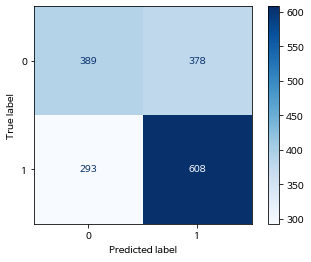

In [254]:
fig, ax = plt.subplots()
pcm = plot_confusion_matrix(pipe6, X_val_selec, y_val_selec,
                            cmap=plt.cm.Blues,
                            ax=ax);

In [255]:
y_pred = pipe6.predict(X_val_selec)
print(classification_report(y_val_selec, y_pred))

              precision    recall  f1-score   support

           0       0.57      0.51      0.54       767
           1       0.62      0.67      0.64       901

    accuracy                           0.60      1668
   macro avg       0.59      0.59      0.59      1668
weighted avg       0.60      0.60      0.59      1668



In [256]:
y_pred_proba = pipe6.predict_proba(X_val_selec)[:, -1]
print('AUC score: ', roc_auc_score(y_val_selec, y_pred_proba))

AUC score:  0.631380170084811


Text(0, 0.5, 'TPR')

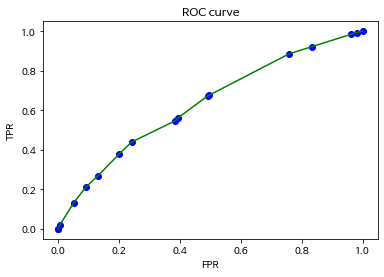

In [257]:
fpr, tpr, thresholds = roc_curve(y_val_selec, y_pred_proba)

plt.scatter(fpr, tpr, color='blue')
plt.plot(fpr, tpr, color='green')
plt.title('ROC curve')
plt.xlabel('FPR')
plt.ylabel('TPR')

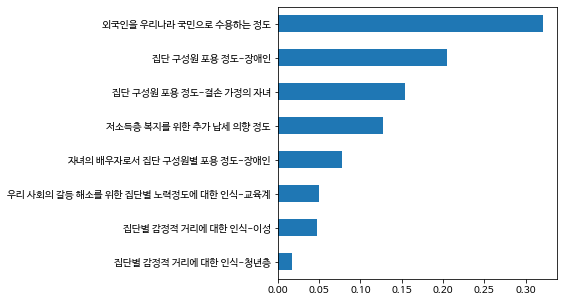

In [261]:
model_dt = pipe6.named_steps['decisiontreeclassifier']
enc = pipe6.named_steps['onehotencoder']
encoded_columns = enc.transform(X_val_selec).columns
importances = pd.Series(model_dt.feature_importances_, encoded_columns)
plt.figure(figsize=(5,5))
importances.sort_values().plot.barh();

In [262]:
importances

집단 구성원 포용 정도-장애인                        0.204859
저소득층 복지를 위한 추가 납세 의향 정도                 0.126866
외국인을 우리나라 국민으로 수용하는 정도                  0.321527
집단별 감정적 거리에 대한 인식-이성                    0.047162
집단별 감정적 거리에 대한 인식-청년층                   0.017459
자녀의 배우자로서 집단 구성원별 포용 정도-장애인             0.078264
우리 사회의 갈등 해소를 위한 집단별 노력정도에 대한 인식-교육계    0.049642
집단 구성원 포용 정도-결손 가정의 자녀                  0.154222
dtype: float64